<a href="https://colab.research.google.com/github/biro224/1603881-creez-votre-site-web-avec-html5-et-css3/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn as sk
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.compose
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('./wines.csv')
print(df.info())
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  type                  6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB
None


Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [4]:
print(df)

      Unnamed: 0  fixed acidity  volatile acidity  citric acid  \
0              0            7.4              0.70         0.00   
1              1            7.8              0.88         0.00   
2              2            7.8              0.76         0.04   
3              3           11.2              0.28         0.56   
4              4            7.4              0.70         0.00   
...          ...            ...               ...          ...   
6492        6492            6.2              0.21         0.29   
6493        6493            6.6              0.32         0.36   
6494        6494            6.5              0.24         0.19   
6495        6495            5.5              0.29         0.30   
6496        6496            6.0              0.21         0.38   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                1.9      0.076                 11.0                  34.0   
1                2.6      0.098                 25.

In [5]:
df_train, df_test = sk.model_selection.train_test_split(df, train_size=0.2)


In [6]:
Y= df_train["quality"]
Y_t= df_test["quality"]

In [7]:
columns= df.columns
columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type'],
      dtype='object')

In [8]:
numeric = columns[1:-2].values.tolist()
numeric

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [9]:
categorical =[columns[-1]]
categorical

['type']

In [10]:
X= df_train[numeric]
model=sk.linear_model.LinearRegression()
model = model.fit(X, Y)

In [11]:
X_t = df_test[numeric]
Y_t_p= model.predict(X_t) 

In [12]:
print(f"MSE={round(sk.metrics.mean_squared_error(Y_t, Y_t_p), 5)},\
\nMAE={round(sk.metrics.mean_absolute_error(Y_t, Y_t_p),5)},\
\nMAE(%)={round(sk.metrics.mean_absolute_percentage_error(Y_t, Y_t_p),5)}")

MSE=0.54873,
MAE=0.57569,
MAE(%)=0.10304


In [13]:
transformer = sk.compose.make_column_transformer(
    (sk.preprocessing.OneHotEncoder(), ['type']), remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(), ['type'])])

In [14]:
X= transformer.fit_transform(df_train[numeric + categorical])
X

array([[ 0.  ,  1.  ,  6.8 , ...,  3.29,  0.55, 10.5 ],
       [ 0.  ,  1.  ,  6.2 , ...,  3.5 ,  0.54, 10.3 ],
       [ 0.  ,  1.  ,  6.7 , ...,  3.36,  0.63, 10.6 ],
       ...,
       [ 0.  ,  1.  ,  6.  , ...,  3.15,  0.34, 12.  ],
       [ 0.  ,  1.  ,  7.  , ...,  2.96,  0.39,  9.  ],
       [ 0.  ,  1.  ,  6.4 , ...,  3.33,  0.43, 10.1 ]])

In [15]:
model = sk.linear_model.LinearRegression()
model = model.fit(X, Y)
X_t = transformer.transform(df_test[numeric + categorical])
Y_t_p= model.predict(X_t)
Y_t_p

array([6.93387309, 6.04914232, 5.76711196, ..., 6.17536796, 5.36766895,
       5.72397266])

In [16]:
print(f"MSE={round(sk.metrics.mean_squared_error(Y_t, Y_t_p), 3)},\
\nMAE={round(sk.metrics.mean_absolute_error(Y_t, Y_t_p),3)},\
\nMAE(%)={round(sk.metrics.mean_absolute_percentage_error(Y_t, Y_t_p),3)}")

MSE=0.546,
MAE=0.575,
MAE(%)=0.103


<function matplotlib.pyplot.show(close=None, block=None)>

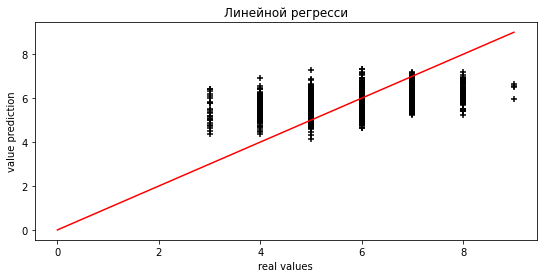

In [20]:
import matplotlib.pyplot as plt
import numpy as np



plt.figure(figsize=(9, 4))
plt.scatter(Y_t, Y_t_p, color='black' , marker='+')
plt.xlabel('real values')
plt.ylabel('value prediction')
plt.title('Линейной регресси')

x= np.linspace(0, np.max(Y_t), 100)
y=x
plt.plot(x, y, color='red')
plt.show